In [1]:
from sideinfo import *
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

('Num of alt: ', 19883.0)
('True null prop: ', 0.80116999999999994)
('BH: num of dis, threshold:', 5904, 0.0029491836787396419)
('Storey_BH: num of dis, threshold, null esti', 6555, 0.0040512852095388316, 0.80883333333333329)


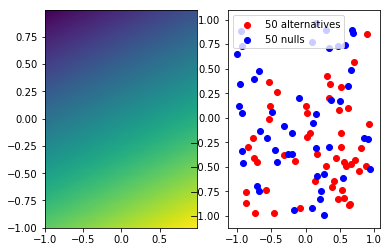

In [2]:
n_samples=100000
p, h, x = generate_data_2D(data_vis=1,n_samples=n_samples, job = 1)
print("Num of alt: ", np.sum(h))
print("True null prop: ", 1-np.sum(h)/n_samples)
dic_BH, t_BH = BH(p)
print("BH: num of dis, threshold:", dic_BH,t_BH)
dic_SBH, t_SBH, pi0_SBH = Storey_BH(p)
print("Storey_BH: num of dis, threshold, null esti", dic_SBH, t_SBH, pi0_SBH)
plt.savefig('2d3.png')

In [9]:
p_target = opt_threshold_multi(x, p, 10, intensity= 0.1)

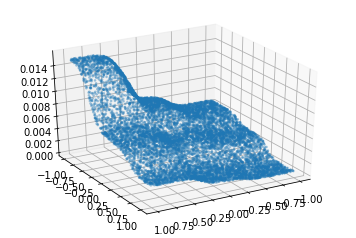

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1] , p_target, s = 3, alpha = 0.3)
ax.view_init(30, 60)

In [52]:
network = get_network(num_layers = 10, dim = 2)
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [53]:
print(BH(p))
print(Storey_BH(p))
#p_target = np.ones(x.shape) * Storey_BH(p)[1]
loss_hist = train_network_to_target_p(network, optimizer, x, p_target, num_it = 3000, dim = 2)

(562, 0.0028004907686589868)
(613, 0.0037776662525661761, 0.80633333333333335)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


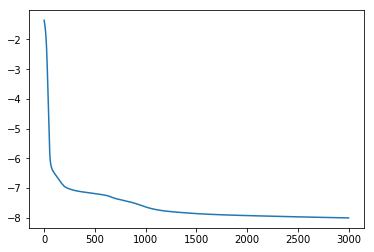

In [54]:
plt.plot(np.log(loss_hist))

In [55]:
#optimizer = optim.Adagrad(network.parameters(), lr = 0.01)
loss_hist, s, s2 = train_network(network, optimizer, x, p, num_it = 3000, dim = 2)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


(Variable containing:
1.00000e-02 *
  7.4173
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-03 *
  3.7272
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  5.0250
[torch.FloatTensor of size 1]
)


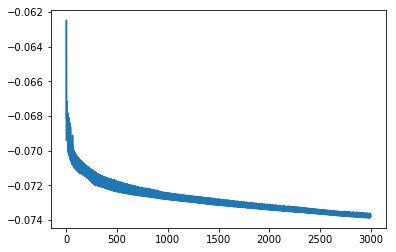

In [56]:
plt.plot(loss_hist)
print(s,s2, s2/s)

In [61]:
n_samples = len(x)
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,2)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

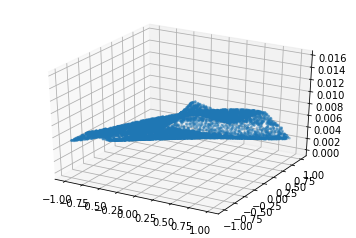

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1] , output.data.numpy(), s = 3, alpha = 0.3)

In [63]:
sum(pred)

758.0

('Num of alternatives:', 2025.0)
('Num of discovery:', 752.0)
('Num of true discovery:', 713.0)
('Actual FDR:', 0.051861702127659615)
Learned rejection threshold:


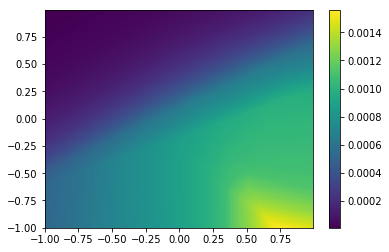

In [66]:
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,2)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))

output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

print("Num of alternatives:",np.sum(h))
print("Num of discovery:",np.sum(pred))
print("Num of true discovery:",np.sum(pred * h))
print("Actual FDR:", 1-np.sum(pred * h) / np.sum(pred))

# Visuaizing the rejection threshold
x_grid = np.arange(-1, 1, 1/100.0)
y_grid = np.arange(-1, 1, 1/100.0)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

x_in = Variable(torch.from_numpy(
    np.concatenate([[X_grid.flatten()], [Y_grid.flatten()]]).T.astype(np.float32)))
out = network(x_in)
z = out.data.numpy().reshape(X_grid.shape)

print('Learned rejection threshold:')
plt.figure()
plt.pcolor(X_grid, Y_grid, z*0.1)
plt.colorbar()
plt.savefig('2d4.png')

In [3]:
with open('data/data_2d_slope.csv', 'w') as f:
    f.write('x1, x2, p_value, h\n')
    for i in range(len(x)):
        f.write("{}, {}, {}, {}\n".format(x[i,0], x[i,1], p[i], h[i]))